In [102]:
options nosource nonotes errors=0;
filename nat1 url "https://uofi.box.com/shared/static/gb07nz7jafspk65wzxq6awlu02kypiq7.csv" termstr=crlf;
filename nat2 url "https://uofi.box.com/shared/static/kr2s5wp3jpxdlpcjmq2qs15oo4797u4y.csv" termstr=crlf;
filename nat3 url "https://uofi.box.com/shared/static/hwsoobqngb8zfyjbwxvmrejjz1lg3yeh.csv" termstr=crlf;
filename nat4 url "https://uofi.box.com/shared/static/omxbqyr1a74w3es75h2f8ihrft8ebipi.csv" termstr=crlf;
filename nat5 url "https://uofi.box.com/shared/static/bkbxdr64tqbv9016cftku1mduot8sqdp.csv" termstr=crlf;
filename nat6 url "https://uofi.box.com/shared/static/cm2g1ltu6mo0tib7tko7i1ek4yt23qb3.csv" termstr=crlf;
filename nat7 url "https://uofi.box.com/shared/static/fggxentxllv9c2vqlziuxegezb4sru0a.csv" termstr=crlf;
filename nat8 url "https://uofi.box.com/shared/static/1dcgq9a80l4s30kng1wtt8blasoeye4s.csv" termstr=crlf;
filename nat9 url "https://uofi.box.com/shared/static/44aowyv5hrg1k2j8d0vyr81wusuealpg.csv" termstr=crlf;
filename nat10 url "https://uofi.box.com/shared/static/xf7r94alpzaqv4wxh5liqw7rpk21wb6l.csv" termstr=crlf;
filename nat11 url "https://uofi.box.com/shared/static/fqz253x7a3rp2koo7ao5hkjhfg9ge0sf.csv" termstr=crlf;
filename nat12 url "https://uofi.box.com/shared/static/sajmr45u3anodk4jv8fotn5c8rxfyoel.csv" termstr=crlf;
filename nat13 url "https://uofi.box.com/shared/static/qs562goaxf52fu9tq8lzu15869m1exja.csv" termstr=crlf;
filename nat14 url "https://uofi.box.com/shared/static/o797c0aokik20t3ki36pkxgo93zicbew.csv" termstr=crlf;
filename nat15 url "https://uofi.box.com/shared/static/k0oo6r8h4sdgv5nj3fnceuici4eisne2.csv" termstr=crlf;
filename nat16 url "https://uofi.box.com/shared/static/8dtro93h20zqpddr6hg6z0qwrjnzk93z.csv" termstr=crlf;
filename nat17 url "https://uofi.box.com/shared/static/jx3nrjnfqnt4v45lvmyrz970fl1d3wqq.csv" termstr=crlf;
filename nat18 url "https://uofi.box.com/shared/static/9lo5hzr82n6t1a21fekgar69yixq6rc2.csv" termstr=crlf;
filename nat19 url "https://uofi.box.com/shared/static/3cgizozuz8afe7gduy6r5phwou3nrxz1.csv" termstr=crlf;
filename nat20 url "https://uofi.box.com/shared/static/eq9k4d73ansal5p8mspu3mpslmzs7x8g.csv" termstr=crlf;

proc import datafile=nat1 out=birth01(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat2 out=birth02(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat3 out=birth03(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat4 out=birth04(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat5 out=birth05(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat6 out=birth06(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat7 out=birth07(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat8 out=birth08(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat9 out=birth09(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat10 out=birth10(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat11 out=birth11(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat12 out=birth12(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat13 out=birth13(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat14 out=birth14(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat15 out=birth15(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat16 out=birth16(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat17 out=birth17(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat18 out=birth18(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat19 out=birth19(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;
proc import datafile=nat20 out=birth20(keep = FAGECOMB CA_ANEN CA_MNSB CA_CCHD CA_CDH CA_OMPH CA_GAST CA_LIMB CA_CLEFT CA_CLPAL CA_DOWN CA_DISOR CA_HYPO OEGest_R3  MAGER FAGECOMB dbwt) replace dbms=csv; 
run;

In [106]:
data birtha;
 set birth01 birth02 birth03 birth04 birth05 birth06 birth07 birth08 birth09 birth10 birth11 birth12 birth13 birth14 birth15 birth16 birth17 birth18 birth19 birth20;
 dbwtlbs = dbwt/454;
 agegap = abs(MAGER - FAGECOMB);
 agegaprecode = 0;
 if agegap > 10 and agegap < 15 then agegap1015 = 1;
  else agegap1015 = 0;
 if agegap >= 15 and agegap < 20 then agegap1520 = 1;
  else agegap1520 = 0;
 if agegap >= 20 then agegap20 = 1;
  else agegap20 = 0;
 if agegap1015 = 1 then agegaprecode = 1;
 if agegap1520 = 1 then agegaprecode = 2;
 if agegap20 = 1 then agegaprecode = 3;
 if CA_ANEN='Y' or CA_MNSB='Y' or CA_CCHD='Y' or CA_CDH='Y' or CA_OMPH='Y' or CA_GAST='Y' or CA_LIMB='Y' or CA_CLEFT='Y' or CA_CLPAL='Y' or CA_DOWN='C' or CA_DISOR='C' or CA_HYPO='Y' then congenital_anomaly_bin=1;
  else congenital_anomaly_bin=0;
 if dbwt ne 9999 and OEGest_R3 ne 3 and FAGECOMB ne 99;
 keep agegaprecode agegap20 agegap1015 agegap1520 agegap OEGest_R3 MAGER FAGECOMB congenital_anomaly_bin dbwtlbs;
run;
options source notes errors=20;

In [107]:
proc print data=birtha (obs=10);
run;

Obs,MAGER,FAGECOMB,OEGEST_R3,dbwtlbs,agegap,agegaprecode,agegap1015,agegap1520,agegap20,congenital_anomaly_bin
1,23,26,2,6.61894,3,0,0,0,0,0
2,36,42,2,7.71145,6,0,0,0,0,0
3,19,19,2,6.82819,0,0,0,0,0,1
4,25,28,2,6.86123,3,0,0,0,0,0
5,28,31,2,8.39207,3,0,0,0,0,0
6,23,24,2,6.92511,1,0,0,0,0,0
7,23,25,2,7.30617,2,0,0,0,0,0
8,33,34,2,7.74229,1,0,0,0,0,0
9,30,62,2,4.97577,32,3,0,0,1,0
10,29,31,2,7.01542,2,0,0,0,0,0


In [162]:
proc means data = birtha;
 class agegaprecode;
 var dbwtlbs;


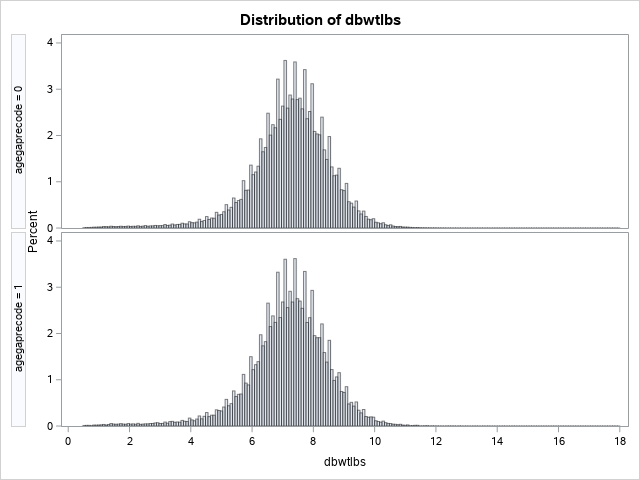
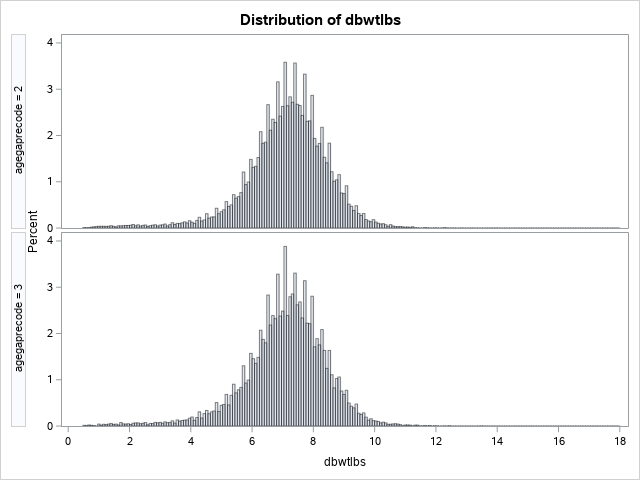

In [163]:
proc univariate data=birtha;
 class agegaprecode;
 histogram dbwtlbs;
 ods select histogram;
run;


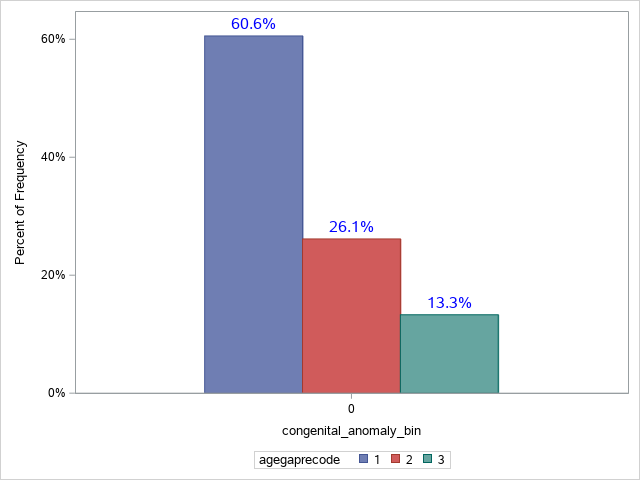

In [164]:
**vbar anaomoly given age recode;

proc sgplot data=birtha;
 where congenital_anomaly_bin = 0 and agegaprecode ne 0;
 vbar congenital_anomaly_bin / stat= percent group=agegaprecode groupdisplay=cluster datalabel datalabelattrs=(size=12pt color=blue); ;
run;


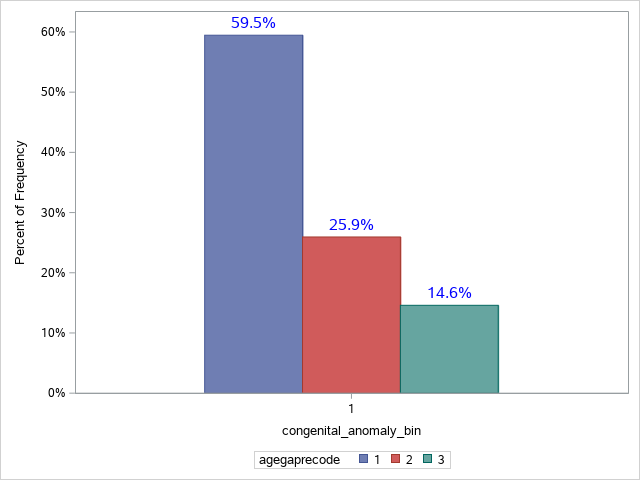

In [165]:
proc sgplot data=birtha;
 where congenital_anomaly_bin = 1 and agegaprecode ne 0;
 vbar congenital_anomaly_bin / stat = percent group=agegaprecode groupdisplay=cluster datalabel datalabelattrs=(size=12pt color=blue); ;
run;

In [167]:
proc logistic data=birtha;
 model congenital_anomaly_bin(event="1") = agegap dbwtlbs OEGEST_R3;
 ods select parameterestimates association rsquare;
run;

proc genmod data=birtha;
 model congenital_anomaly_bin(event="1") = agegaprecode dbwtlbs OEGEST_R3 / dist=binomial link=logit;
 ods select parameterestimates;
run;

In [166]:
proc logistic data=birtha;
 model congenital_anomaly_bin(event="1") =  dbwtlbs OEGEST_R3 ;
 ods select parameterestimates association rsquare;
run;

proc genmod data=birtha;
 model congenital_anomaly_bin(event="1") =  dbwtlbs OEGEST_R3 / dist=binomial link=logit;
 ods select parameterestimates;
run;